In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
medical_line_df = pd.read_csv('Smaller_Claim_Medical_Line.csv', index_col=[0])
medical_line_df

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
358985506,19,11,NaN,D9951,,,,,2016-10-05,1,...,0,N,N,0.00,0.00,0.00,Y,UN,Units,2016
358982958,3,11,NaN,D0120,,,,,2016-02-02,1,...,0,N,N,0.00,0.00,28.00,Y,UN,Units,2016
238253746,1,11,NaN,99213,25,,,,2016-04-25,1,...,0,N,N,0.00,0.00,0.00,N,UN,Units,2016
358996411,3,11,NaN,96372,,,,,2016-04-05,1,...,0,N,N,0.00,0.00,0.00,N,UN,Units,2016
358985561,2,11,NaN,17280,XU,,,,2016-12-22,1,...,0,N,N,0.00,0.00,0.00,N,UN,Units,2016
358984479,1,99,450.0,00000,,,,,2016-02-13,1,...,0,N,Y,0.00,0.00,281.00,N,UN,Units,2016
171447849,1,11,NaN,99213,,,,,2016-07-26,1,...,0,N,N,0.00,7.45,0.00,N,UN,Units,2016
358987119,24,99,444.0,00000,,,,,2016-04-28,1,...,0,N,N,0.00,0.00,0.00,N,UN,Units,2016
358996654,32,99,551.0,00000,,,,,2016-09-30,4,...,0,N,N,0.00,0.00,0.00,N,UN,Units,2016


In [4]:
medical_line_df['Unit_Of_Measure_Cd'].nunique()

3

In [5]:
medical_line_df['CPT4_ID'].nunique()

3244

In [6]:
list(medical_line_df.columns.values)

['Claim_Line_No',
 'Place_of_Service_Cd',
 'Rev_Cd',
 'CPT4_ID',
 'CPT4_Mod1_Cd',
 'CPT4_Mod2_Cd',
 'CPT4_Mod3_Cd',
 'CPT4_Mod4_Cd',
 'Service_Start_Dt',
 'Units',
 'Charge_Amt',
 'Prepaid_Amt',
 'Plan_Paid_Amt',
 'NDC_Cd',
 'Capitation_Flag',
 'ER_Flag',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Deductible_Amt',
 'Dental_Flag',
 'Unit_Of_Measure_Cd',
 'Unit_Of_Measure_Desc',
 'Service_Start_Year']

In [10]:
medical_line_df.values.any()

19

In [8]:
medical_line_edited = medical_line_df.drop(['Dental_Flag', 'Service_Start_Year', 'Unit_Of_Measure_Desc', 'Unit_Of_Measure_Cd'], axis=1)
medical_line_edited.head(500)

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,,,,,,,,,
358985506,19,11,NaN,D9951,,,,,2016-10-05,1,15.00,0.0,0.00,0,N,N,0.00,0.00,0.00
358982958,3,11,NaN,D0120,,,,,2016-02-02,1,28.00,0.0,0.00,0,N,N,0.00,0.00,28.00
238253746,1,11,NaN,99213,25,,,,2016-04-25,1,136.00,0.0,70.87,0,N,N,0.00,0.00,0.00
358996411,3,11,NaN,96372,,,,,2016-04-05,1,40.00,0.0,29.92,0,N,N,0.00,0.00,0.00
358985561,2,11,NaN,17280,XU,,,,2016-12-22,1,263.00,0.0,27.28,0,N,N,0.00,0.00,0.00
358984479,1,99,450.0,00000,,,,,2016-02-13,1,281.00,0.0,0.00,0,N,Y,0.00,0.00,281.00
171447849,1,11,NaN,99213,,,,,2016-07-26,1,110.00,0.0,67.10,0,N,N,0.00,7.45,0.00
358987119,24,99,444.0,00000,,,,,2016-04-28,1,252.13,0.0,8.96,0,N,N,0.00,0.00,0.00
358996654,32,99,551.0,00000,,,,,2016-09-30,4,437.00,0.0,0.00,0,N,N,0.00,0.00,0.00


In [32]:
len(medical_line_edited.columns)

20

In [15]:
medical_line_df[['NDC_Cd']]

,NDC_Cd
Claim_ID,
358985506,0
358982958,0
238253746,0
358996411,0
358985561,0
358984479,0
171447849,0
358987119,0
358996654,0


In [17]:
medical_line_df['NDC_Cd'].nunique()


601

In [6]:
list(medical_line_df.columns.values)

['Claim_ID',
 'Claim_Line_No',
 'Place_of_Service_Cd',
 'Rev_Cd',
 'CPT4_ID',
 'CPT4_Mod1_Cd',
 'CPT4_Mod2_Cd',
 'CPT4_Mod3_Cd',
 'CPT4_Mod4_Cd',
 'Service_Start_Dt',
 'Units',
 'Charge_Amt',
 'Prepaid_Amt',
 'Plan_Paid_Amt',
 'NDC_Cd',
 'Capitation_Flag',
 'ER_Flag',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Deductible_Amt',
 'Dental_Flag',
 'Unit_Of_Measure_Cd',
 'Unit_Of_Measure_Desc',
 'Service_Start_Year']

In [12]:
medical_line_df['Capitation_Flag'].nunique()

2

In [11]:
medical_line_df[['Claim_ID', 'NDC''Charge_Amt']]


,Claim_ID,Charge_Amt
0,358985506,15.00
1,358982958,28.00
2,238253746,136.00
3,358996411,40.00
4,358985561,263.00
5,358984479,281.00
6,171447849,110.00
7,358987119,252.13
8,358996654,437.00
9,281568939,679.00


In [25]:
medical_line_edited.isnull().sum(axis = 0)

Claim_ID                   0
Claim_Line_No              0
Place_of_Service_Cd        0
Rev_Cd                 85851
CPT4_ID                    0
CPT4_Mod1_Cd               0
CPT4_Mod2_Cd               0
CPT4_Mod3_Cd               0
CPT4_Mod4_Cd               0
Service_Start_Dt           0
Units                      0
Charge_Amt                 0
Prepaid_Amt                0
Plan_Paid_Amt              0
NDC_Cd                     0
Capitation_Flag            0
ER_Flag                    0
Copay_Amt                  0
Coinsurance_Amt            0
Deductible_Amt             0
Unit_Of_Measure_Cd         0
dtype: int64

In [19]:
medical_line_edited2 = medical_line_edited.sort_values(by = ['Claim_ID'])
medical_line_edited2

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,,,,,,,,,
98298647,15,99,710.0,00000,,,,,2016-02-10,2,1062.00,17127.07,0.00,0,N,N,0.00,0.00,0.00
98298647,14,99,460.0,00000,,,,,2016-02-10,1,57.00,17127.07,0.00,0,N,N,0.00,0.00,0.00
98330935,19,99,424.0,97001,GP,,,,2016-02-16,1,73.78,0.00,57.84,0,N,N,0.00,14.76,0.00
98330961,1,99,258.0,J7030,,,,,2016-02-17,1,56.18,0.00,0.00,0,N,N,0.00,0.00,51.69
98958650,2,99,272.0,00000,,,,,2016-01-05,4,500.10,1416.94,130.45,0,N,N,0.00,32.61,91.49
98958650,1,99,270.0,00000,,,,,2016-01-05,1,108.40,1416.94,0.00,0,N,N,0.00,0.00,55.18
98975015,2,99,450.0,99283,,,,,2016-01-17,1,988.02,0.00,150.00,0,N,Y,250.00,0.00,472.72
98975015,1,99,250.0,00000,,,,,2016-01-17,4,27.28,0.00,0.00,0,N,N,0.00,0.00,27.28
98975016,1,99,510.0,G0463,,,,,2016-01-12,1,212.47,95.28,95.28,0,N,N,0.00,0.00,0.00


medical_line_edited2 = medical_line_edited.sort_values(by=['Claim_ID'])
medical_line_edited2

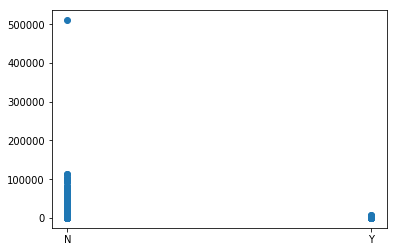

In [41]:
plt.scatter(medical_line_edited['ER_Flag'], medical_line_edited['Charge_Amt'])

In [42]:
X = pd.DataFrame(medical_line_edited['Units'])
y = pd.DataFrame(medical_line_edited['Charge_Amt'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(scores)

[0.046554136237482835, 0.003339079417482127, 0.005067152814624554]


In [20]:
medical_line_edited['CPT4_ID']

Claim_ID
358985506    D9951
358982958    D0120
238253746    99213
358996411    96372
358985561    17280
358984479    00000
171447849    99213
358987119    00000
358996654    00000
281568939    99284
239303210    D4910
248413959    97110
358995481    00000
248413959    97140
358983710    D2392
358952520    D4341
358952568    00000
358950309    00000
359004724    00000
359002401    00000
359005061    00000
359002695    D9223
359005076    96372
359005181    00000
359002843    00000
171447851    99393
282610850    99214
358956207    D0272
283264429    99205
281568959    99215
             ...  
171173858    93005
171173859    99214
171173859    71020
171173872    31256
171173872    31240
171173872    31240
171173873    99214
171173874    99214
171173875    99214
171173876    99391
171173876    90473
171173876    90472
171173876    90685
171173876    90670
171173876    90680
171173876    90723
171173877    99213
171173878    99214
171173879    99203
171173880    99391
171173880    90471
171